In [2]:
!sqlite -version

2.8.17


In [4]:
# Code Cell 2
!sqlite3 ./Data/InternetSpeed.db ".database"

main: /home/neko/PycharmProjects/abd/lab3/Data/InternetSpeed.db r/w


In [5]:
# Code Cell 3
#Installing csvkit
!pip install csvkit

In [6]:
# Code Cell 4
# Removing database if already existing
!test -e InternetSpeed.db && rm InternetSpeed.db
# Importing the LA_wifi_speed_UK.csv file into a sql database file InternetSpeed.db
!csvsql --db sqlite:///InternetSpeed.db --insert ./Data/LA_wifi_speed_UK.csv
# This will take a while 

In [7]:
# Code Cell 5
# this is the library to talk to the database
import sqlite3
import pandas as pd
# this is a library for data visualization
from matplotlib import pyplot as plt
# this is to say that we want our plots to be part of this page, and not opened in a new window
%matplotlib inline


In [8]:
# Code Cell 6
conn = sqlite3.connect("InternetSpeed.db")
cur = conn.cursor()

In [9]:
# Code Cell 7
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY DateTime LIMIT 10;'

cur.execute(query)

In [10]:
# Code Cell 8
for row in cur:
    print(row) 

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [11]:
# Code Cell 9
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10'
cur.execute(query)

for row in cur:
    print(row) 

('2016-12-02 04:30:00.000000',)
('2016-11-26 05:30:00.000000',)
('2016-11-24 05:30:00.000000',)
('2016-12-04 19:30:00.000000',)
('2016-12-04 12:00:00.000000',)
('2016-12-04 17:30:00.000000',)
('2016-11-24 00:30:00.000000',)
('2016-12-12 03:00:00.000000',)
('2016-12-08 19:00:00.000000',)
('2016-12-08 04:00:00.000000',)


In [12]:
# Code Cell 10
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(query)

In [13]:
# Code Cell 11
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [14]:
# Code Cell 12
# loop over the header and store them in a list
columns = [member[0] for member in cur.description]

# ignore index column
columns = columns[1:]

In [15]:
# Code Cell 13
# remove suffix '_p'
columns = [c.replace('_p', '') for c in columns]
# remove suffix '_d'
columns = [c.replace('_d', '') for c in columns]
# remove suffix '_u'
# columns = ??
columns = [c.replace('_u', '') for c in columns]

    
# this operation is to remove duplicates
columns = list(set(columns))

In [16]:
# Code Cell 14
# visualize the first 10 areas
columns[:10]

['E08000020',
 'E07000005',
 'E07000115',
 'E07000122',
 'E07000043',
 'E09000030',
 'E07000123',
 'E07000096',
 'E09000012',
 'E09000014']

In [17]:
# Code Cell 15
area = columns[0]
print(area) 

E08000020


In [18]:
# Code Cell 16
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
# we have the suffixes as the keys of the dictionary
print(suffix.keys())

# we have the complete names as the values of the dictionary
print(suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E08000020')

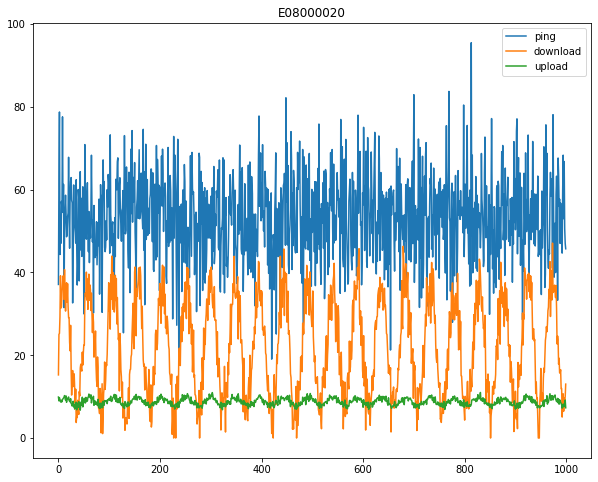

In [19]:
# Code Cell 17
area = columns[0]
plt.figure(figsize=(10, 8))

# Plot each variable in suffix.keys() for each area
for s in suffix.keys():
    query = 'SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime'.format(area, s)
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.legend()
plt.title(area)

In [20]:
# Code Cell 18
new_columns = ['Area', 'Average_p', 'Average_d', 'Average_u']
df = pd.DataFrame(columns=new_columns)

In [21]:
# Code Cell 19
# this will take a while...
for i in range(len(columns)-1): #EDL : replace xrange with range
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        query = 'SELECT AVG("{}{}") FROM LA_wifi_speed_UK'.format(columns[i], s)
        cur.execute(query)
        
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    #append the columns to the empty DataFrame
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
# visualize the head of the dataframe here
df.head()

,Area,Average_p,Average_d,Average_u
0,E08000020,53.251025,21.993000,8.776633
1,E07000005,51.607898,20.853906,8.337848
2,E07000115,52.101567,21.375505,8.442038
3,E07000122,52.232849,20.966287,8.312183
4,E07000043,51.876843,20.972191,8.357638


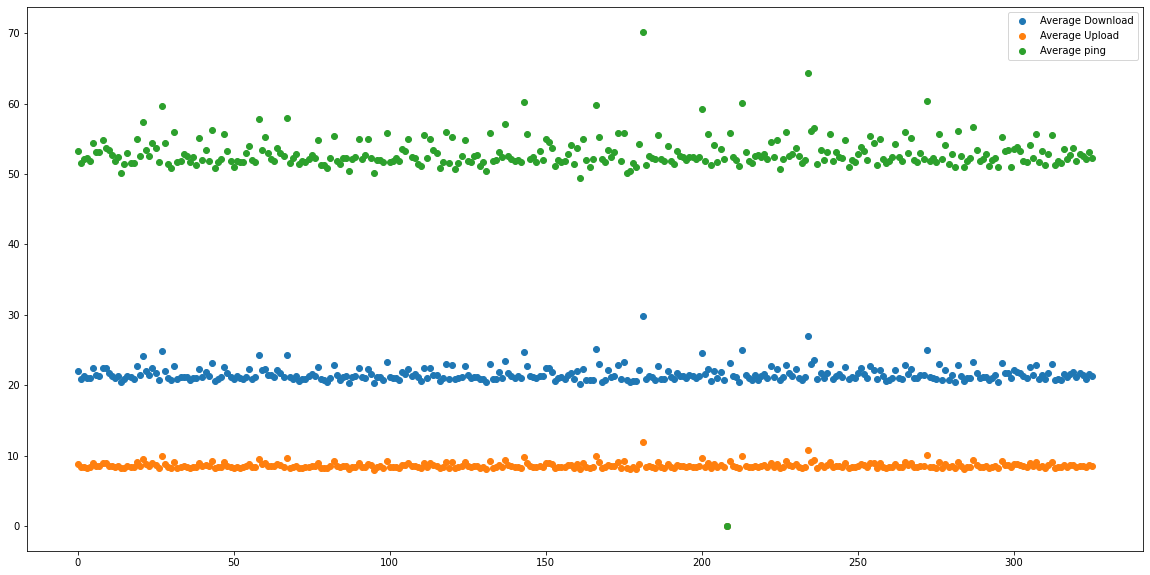

In [22]:
# Code Cell 20
plt.figure(figsize=(20,10))
plt.plot(df.index, df[['Average_d','Average_u','Average_p']], 'o')
plt.legend(['Average Download', 'Average Upload', 'Average ping'])

In [23]:
# Code Cell 21
# Make sure to drop the table first if it already exists
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

# what is the name of the table you want to save? To what connection?
# Save the dataframe table into a SQL table
df.to_sql('average_speed', conn)


In [24]:
# Code Cell 22
# just checking everything worked fine: select everything from the table we just created
# and then print the first two rows of the result

query_2 = 'SELECT * FROM average_speed'
cur.execute(query_2)

# print the first fetched record
print(cur.fetchone())
# print the next fetched record
print(cur.fetchone())

(0, 'E08000020', 53.25102493363281, 21.993000231368384, 8.776633463657399)
(1, 'E07000005', 51.60789768048243, 20.85390629215823, 8.3378475048381)


In [25]:
# Code Cell 23
#first close the database file, otherwise the external csvsql command cannot use
conn.close()

In [26]:
# Code Cell 24
# use the external csvsql command to add to the DB file data from the CSV file
!csvsql --db sqlite:///InternetSpeed.db --insert ./Data/LA_population.csv



In [27]:
# Code Cell 25
#reopen the DB file
conn = sqlite3.connect("InternetSpeed.db")
cur = conn.cursor()

In [28]:
# Code Cell 26
query = 'SELECT * FROM LA_population LIMIT 10'

cur.execute(query)

for row in cur:
    print(row)


('Aberdeen City', 'S12000033', 222793.0)
('Aberdeenshire', 'S12000034', 252973.0)
('Adur', 'E07000223', 61182.0)
('Allerdale', 'E07000026', 96422.0)
('Amber Valley', 'E07000032', 122309.0)
('Angus', 'S12000041', 115978.0)
('Antrim and Newtownabbey', 'N09000001', 138567.0)
('Ards and North Down', 'N09000011', 156672.0)
('Argyll and Bute', 'S12000035', 88166.0)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693.0)


In [29]:
# Code Cell 27
query = 'SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area'

cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break
    print(row)
    k+=1

(0, 'E08000020', 53.25102493363281, 21.993000231368384, 8.776633463657399, 'Gateshead', 'E08000020', 200214.0)
(1, 'E07000005', 51.60789768048243, 20.85390629215823, 8.3378475048381, 'Chiltern', 'E07000005', 92635.0)
(2, 'E07000115', 52.10156723346487, 21.37550491933514, 8.442038494923409, 'Tonbridge and Malling', 'E07000115', 120805.0)
(3, 'E07000122', 52.23284891564401, 20.966287498205027, 8.31218342667357, 'Pendle', 'E07000122', 89452.0)
(4, 'E07000043', 51.876843011488056, 20.972191298044606, 8.357638244770273, 'North Devon', 'E07000043', 93667.0)
(5, 'E09000030', 54.41200080869418, 22.46943790160951, 8.983481037783513, 'Tower Hamlets', 'E09000030', 254096.0)
(6, 'E07000123', 53.13362580812839, 21.447637342357698, 8.534959831436247, 'Preston', 'E07000123', 140202.0)
(7, 'E07000096', 53.16856313333757, 21.355440255772134, 8.502911500126835, 'Dacorum', 'E07000096', 144847.0)
(8, 'E09000012', 54.84347821636723, 22.419288940226206, 8.930884609297548, 'Hackney', 'E09000012', 246270.0)
(